In [1]:
## feature distribution : do a pca plot (on original feat. set) & 
# check the distribution of data points for different classes

import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import decomposition

## check if PCA scales the data internally, or scaling needs to be done

In [2]:
def get_pca(X_train):
    pca = decomposition.PCA()  # n_components = N; should be <= #features
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    #X_test_pca = pca.transform(X_test)
    print(pca.explained_variance_ratio_)
    
    ## plot PC variances
    pca_var = pca.explained_variance_ratio_
    indices = np.argsort(pca_var)[::-1]
    
    plt.figure()
    plt.title('PCA variance')
    plt.bar(range(X_train_pca.shape[1]), pca_var[indices], color='r', align ="center")
    plt.xticks(range(X_train_pca.shape[1]), indices)
    plt.xlim([-1, X_train_pca.shape[1]])
    plt.show()
    
    # Dump components relations with features:
    print(pd.DataFrame(pca.components_, columns = X_train.columns)) #,index = ['PC-1','PC-2'])
    # https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn


In [3]:
def get_pca_2(X_train):
    ## using 2 components
    pca = decomposition.PCA(n_components = 2)  # n_components = N; should be <= #features
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    #X_test_pca = pca.transform(X_test)
    return X_train_pca

In [4]:
## plot PCA-transformed data
def plot_pca2(X_train_pca, y_train):
    principalDf = pd.DataFrame(data = X_train_pca, columns = ['PC 1', 'PC 2'])
    finalDf = pd.concat([principalDf, y_train], axis = 1)
    
    plt.scatter(finalDf['PC 1'], finalDf['PC 2'], alpha=0.5, c=finalDf['class2'], cmap='viridis') #alpha=0.2,cmap='viridis'
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.colorbar()
    plt.show()

In [5]:
### read in feature file ###
import pickle
file_location='C:/Users/DAR9KOR/Desktop/data/HEALTHCARE/EEG/data/eeg_epochs_dec12_2018/raw_data' 
os.chdir(file_location) #'/home/intern_eyecare/Desktop/EEG/sax_dimer' 

# remove 2nd night of subject 13, as there was data loss - pkl file created accordingly
dfull = pickle.load(open('sax_dimer_0.1s_EEG_all_patients.pkl', 'rb'))
dfull.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,pID,day,epoch,class_label
0,33,15,5,4,20,52,18,6,3,25,49,14,1,3,19,32,400,1,s1e1,wake
1,27,12,6,5,15,63,24,3,6,29,51,9,2,1,14,32,400,1,s1e2,wake
2,39,13,1,0,12,63,16,7,2,21,50,9,0,1,15,50,400,1,s1e3,wake
3,37,25,9,2,15,22,23,10,15,15,33,20,6,7,18,42,400,1,s1e4,wake
4,30,22,15,0,14,18,29,10,17,23,40,24,6,8,19,24,400,1,s1e5,wake


In [6]:
# check data distribution
dfull.groupby('class_label').size()

class_label
sleep_stage_1     2804
sleep_stage_2    17799
wake             72391
dtype: int64

In [7]:
### convert from 3-class to 2-class ###
dfull['class2'] = dfull['class_label']
dfull['class2'] = [0 if x == 'wake' else 1 for x in dfull['class2']]

In [8]:
X_train = dfull.drop(['pID', 'day', 'epoch', 'class_label', 'class2'], 1)
y_train = dfull[['class2']]

[4.77277457e-01 2.20013052e-01 1.50948742e-01 4.77387052e-02
 2.92322047e-02 1.89225216e-02 1.51305812e-02 1.44005635e-02
 9.80401976e-03 7.36451885e-03 5.83870130e-03 3.10550305e-03
 9.82555568e-05 6.89903888e-05 5.37805891e-05 2.40405253e-06]


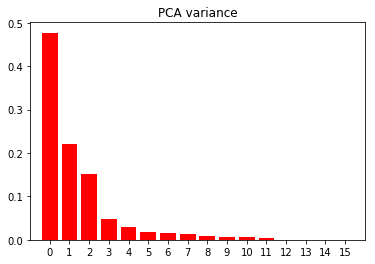

          0         1         2         3         4         5         6   \
0  -0.287586 -0.145227 -0.072542  0.002454 -0.123557  0.646336  0.109804   
1  -0.478126  0.073272  0.099717  0.002395  0.023343 -0.361482  0.379521   
2  -0.263261  0.032318  0.014920  0.048372  0.066397  0.574225  0.020142   
3  -0.476702  0.119393  0.213586  0.203141  0.298169 -0.032347 -0.596314   
4   0.300304 -0.013192  0.006101 -0.161751 -0.244679  0.216695 -0.108985   
5   0.206122 -0.626346  0.314053  0.295234 -0.275828 -0.041918 -0.232322   
6   0.047729  0.132073  0.052737  0.055021 -0.243717 -0.021307  0.143924   
7  -0.412858 -0.255436  0.129870 -0.076763 -0.458031 -0.055058  0.189705   
8   0.025500  0.320888 -0.405534  0.168406 -0.304061 -0.001325  0.101885   
9   0.107580 -0.066106  0.053991  0.491081  0.225003 -0.002453  0.195457   
10  0.105456  0.199424  0.578146 -0.487633  0.039579  0.070739 -0.022732   
11 -0.029881  0.159205  0.068339  0.119504 -0.176111 -0.033940 -0.075486   
12  0.000229

In [9]:
get_pca(X_train)

In [10]:
X_train_pca2 = get_pca_2(X_train)
print(X_train_pca2)

[[ -3.23727655  -3.97763842]
 [ 10.53618132  -3.30477021]
 [  0.49504792 -25.04791632]
 ...
 [-27.73508831  19.38973338]
 [-19.07958209  37.58081872]
 [-10.48063343  35.77495568]]


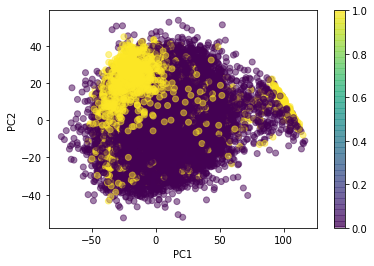

In [11]:
plot_pca2(X_train_pca2, y_train)

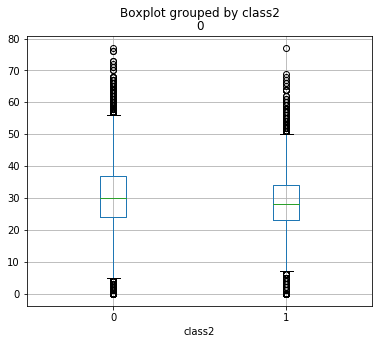

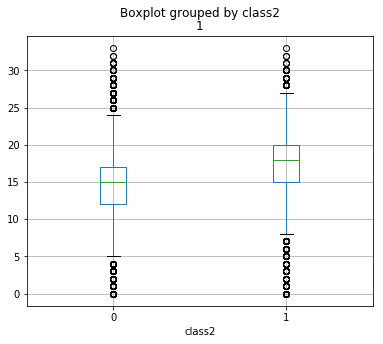

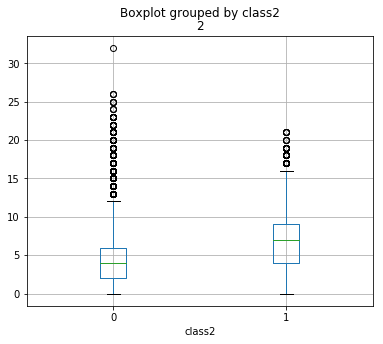

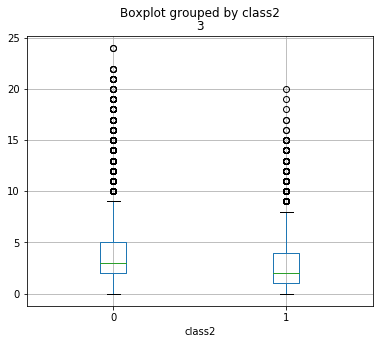

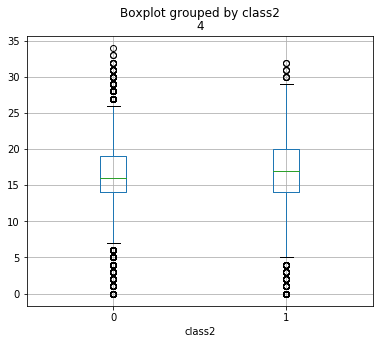

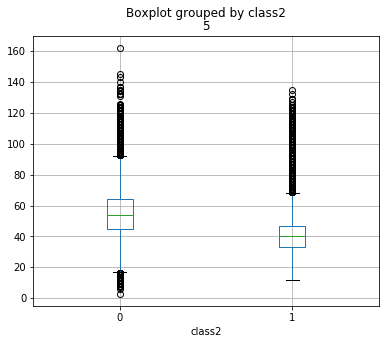

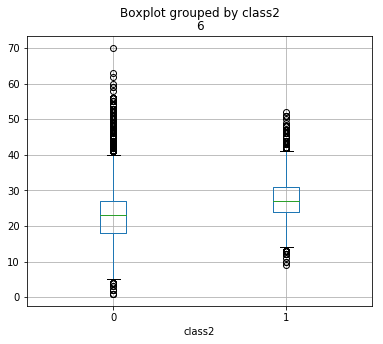

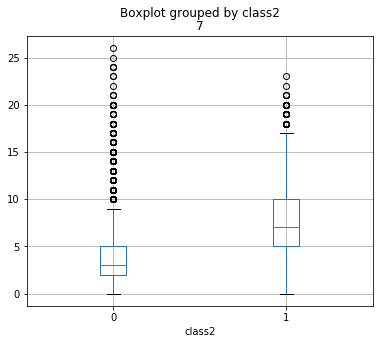

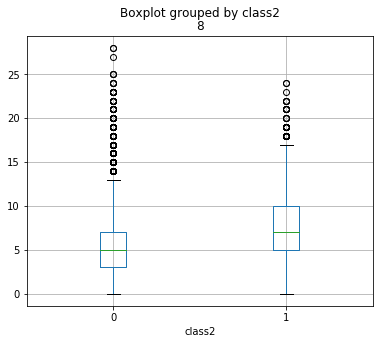

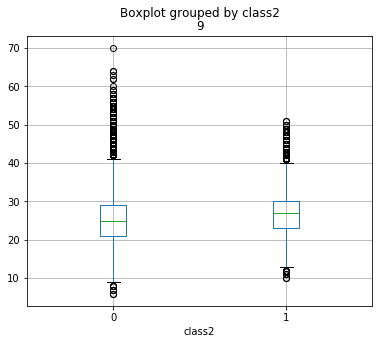

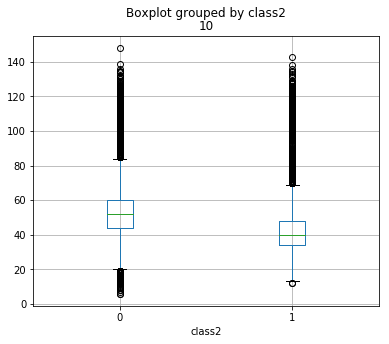

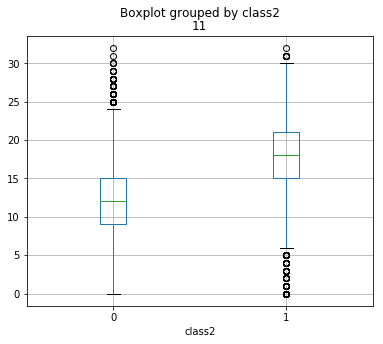

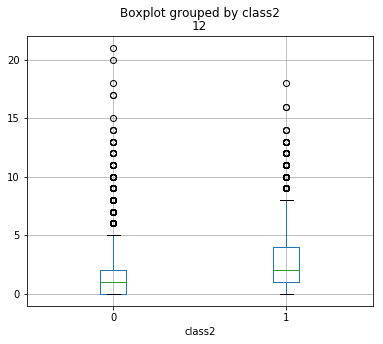

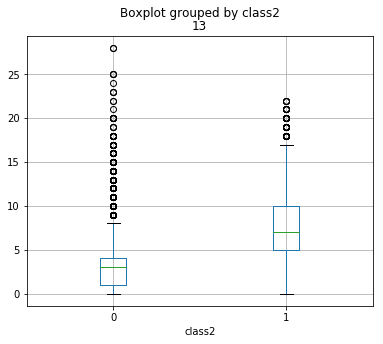

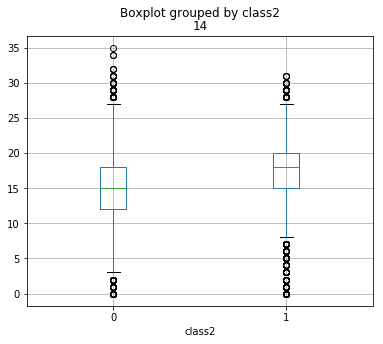

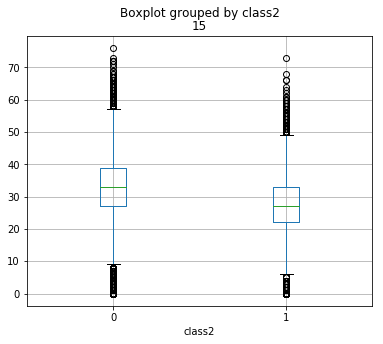

In [12]:
df_list = dfull.columns.tolist()
for i in range(0,16):
    fig, ax = plt.subplots(figsize=(6,5))
    plt.suptitle(df_list[i])
    dfull.boxplot(column=df_list[i], by='class2', ax=ax)
    plt.show()

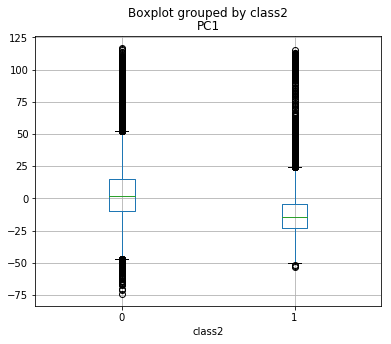

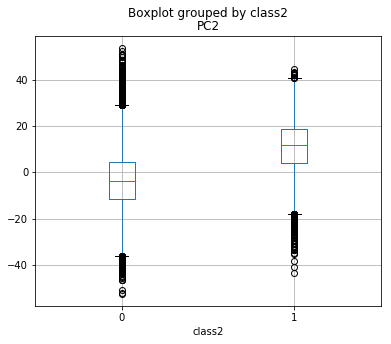

In [13]:
## box-plot of PC1 & PC2 by class

X_tr = pd.DataFrame((X_train_pca2))
X_tr = pd.concat([X_tr, dfull['class2']], axis=1)
X_tr.columns = ['PC1', 'PC2', 'class2']
X_tr_list = X_tr.columns.tolist()

for i in range(0,2):
    fig, ax = plt.subplots(figsize=(6,5))
    plt.suptitle(X_tr_list[i])
    X_tr.boxplot(column = X_tr_list[i], by='class2', ax=ax)
    plt.show()

In [14]:
### try 3 PCs ###
pca3 = decomposition.PCA(n_components = 3)  # n_components = N; should be <= #features
pca3.fit(X_train)
X_train_pca3 = pca3.transform(X_train)
X_train_pca3

array([[ -3.23727655,  -3.97763842,   0.34693249],
       [ 10.53618132,  -3.30477021,   6.40147767],
       [  0.49504792, -25.04791632,   3.94725969],
       ...,
       [-27.73508831,  19.38973338,   0.75217478],
       [-19.07958209,  37.58081872,  10.49253978],
       [-10.48063343,  35.77495568,  17.22394335]])

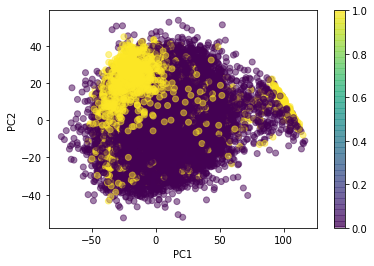

In [15]:
X_tr3 = pd.DataFrame(X_train_pca3)
X_tr3.columns = ['PC1', 'PC2', 'PC3']
principalDf = X_tr3[['PC1', 'PC2']]  #pd.DataFrame(data = X_train_pca3, 
finalDf = pd.concat([principalDf, y_train], axis = 1)
    
plt.scatter(finalDf['PC1'], finalDf['PC2'], alpha=0.5, c=finalDf['class2'], cmap='viridis') #alpha=0.2,cmap='viridis'
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

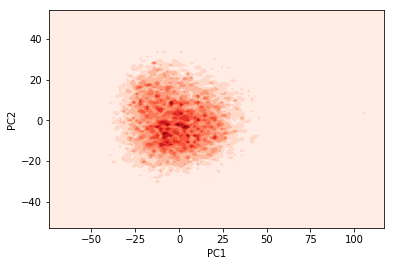

In [19]:
# as 2D density plot
X_tr3 = pd.DataFrame(X_train_pca3)
X_tr3.columns = ['PC1', 'PC2', 'PC3']
principalDf = X_tr3[['PC1', 'PC2']]  #pd.DataFrame(data = X_train_pca3, 
finalDf = pd.concat([principalDf, y_train], axis = 1)

import seaborn as sns
sns.kdeplot(finalDf['PC1'], finalDf['PC2'], cmap="Reds", shade=True, bw=.15)
sns.plt.show()

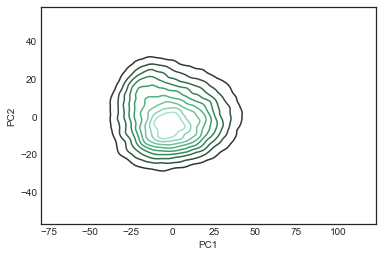

In [21]:
sns.set_style("white")
sns.kdeplot(finalDf['PC1'], finalDf['PC2'])

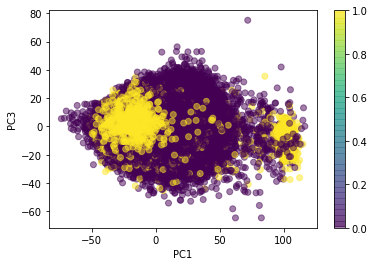

In [16]:
principalDf = X_tr3[['PC1', 'PC3']]  #pd.DataFrame(data = X_train_pca3, 
finalDf = pd.concat([principalDf, y_train], axis = 1)
    
plt.scatter(finalDf['PC1'], finalDf['PC3'], alpha=0.5, c=finalDf['class2'], cmap='viridis') #alpha=0.2,cmap='viridis'
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.colorbar()
plt.show()

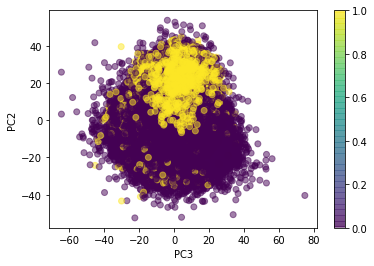

In [17]:
principalDf = X_tr3[['PC3', 'PC2']]  #pd.DataFrame(data = X_train_pca3, 
finalDf = pd.concat([principalDf, y_train], axis = 1)
    
plt.scatter(finalDf['PC3'], finalDf['PC2'], alpha=0.5, c=finalDf['class2'], cmap='viridis') #alpha=0.2,cmap='viridis'
plt.xlabel('PC3')
plt.ylabel('PC2')
plt.colorbar()
plt.show()

In [22]:
## scale the data, then do PCA
## normalize the data  : can also use other scalers like StandardScaler()
#X_train = dfull.drop(['pID', 'day', 'epoch', 'class_label', 'class2'], 1)
#y_train = dfull[['class2']]

scaler = StandardScaler()  #MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)  #X_test_scaled = scaler.transform(X_test)

pca3 = decomposition.PCA(n_components = 3)  # n_components = N; should be <= #features
pca3.fit(X_train_scaled)
X_train_pca3 = pca3.transform(X_train_scaled)
X_train_pca3

C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.43560744, -0.95249583,  0.27098542],
       [-1.28461697,  0.24936224,  1.23404407],
       [-1.53847457, -2.74791179, -0.75928596],
       ...,
       [ 4.66460018,  2.18188635, -0.22446564],
       [ 4.79039375,  5.27430315,  1.46816448],
       [ 3.92460513,  5.05314297,  2.70786125]])

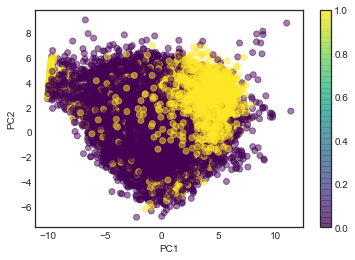

In [23]:
X_tr3 = pd.DataFrame(X_train_pca3)
X_tr3.columns = ['PC1', 'PC2', 'PC3']
principalDf = X_tr3[['PC1', 'PC2']]  #pd.DataFrame(data = X_train_pca3, 
finalDf = pd.concat([principalDf, y_train], axis = 1)
    
plt.scatter(finalDf['PC1'], finalDf['PC2'], alpha=0.5, c=finalDf['class2'], cmap='viridis') #alpha=0.2,cmap='viridis'
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()

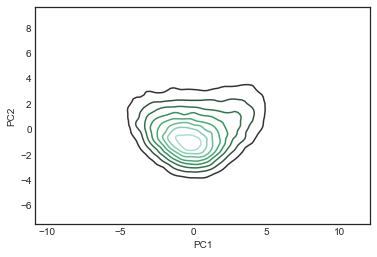

In [24]:
# as 2D density plot
X_tr3 = pd.DataFrame(X_train_pca3)
X_tr3.columns = ['PC1', 'PC2', 'PC3']
principalDf = X_tr3[['PC1', 'PC2']]  #pd.DataFrame(data = X_train_pca3, 
finalDf = pd.concat([principalDf, y_train], axis = 1)

sns.set_style("white")
sns.kdeplot(finalDf['PC1'], finalDf['PC2'])

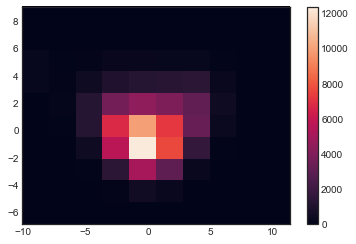

In [25]:
h = plt.hist2d(finalDf['PC1'], finalDf['PC2'])
plt.colorbar(h[3])

In [26]:
h

(array([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         1.9000e+01, 1.9500e+02, 1.9900e+02, 1.0000e+01, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.7000e+01, 6.6000e+01,
         1.4800e+02, 1.3700e+02, 5.3000e+01, 8.0000e+00, 3.0000e+00],
        [0.0000e+00, 4.0000e+00, 6.9000e+01, 4.9600e+02, 1.2800e+03,
         1.2360e+03, 5.1600e+02, 1.2000e+02, 1.7000e+01, 0.0000e+00],
        [5.0000e+00, 1.1100e+02, 1.4150e+03, 5.6620e+03, 6.8000e+03,
         3.7090e+03, 1.0730e+03, 2.5300e+02, 2.5000e+01, 1.0000e+00],
        [3.0000e+01, 5.6200e+02, 5.1680e+03, 1.2378e+04, 9.9840e+03,
         4.4520e+03, 1.2480e+03, 2.4200e+02, 2.4000e+01, 1.0000e+00],
        [1.2000e+01, 3.1900e+02, 3.0590e+03, 7.6820e+03, 7.2160e+03,
         3.9990e+03, 1.3370e+03, 2.2800e+02, 2.2000e+01, 0.0000e+00],
        [0.0000e+00, 1.1000e+01, 2.9400e+02, 1.6980e+03, 3.2540e+03,
         3.0990e+03, 1.4230e+03, 1.9800e+02, 1.3000e+01, 0.0000e+00],
        [0.0000e+00, 1.0000

In [ ]:
## find similar feature vectors for the 2 classes, from   i. same patient  ii. different patient

In [ ]:
# distance calculation: within each class
# segregate data by class
df0 = dfull[(dfull.class2) == 0]
df0.reset_index(inplace=True, drop=True)
df0.head(2)

In [ ]:
df0.shape

In [ ]:
dfull.dtypes

In [ ]:
df0 = dfull[ (dfull.class2 == 0) & (dfull.pID == '400') ]
df0.reset_index(inplace=True, drop=True)
df0.shape

In [ ]:
df1 = dfull[(dfull.class2) == 1]
df1.reset_index(inplace=True, drop=True)
df1.head(2)

In [ ]:
df1.shape

In [ ]:
from numpy.linalg import norm

#rel_cols = ['A660_80', 'A590_80', 'A940_80', 'A810_80',
#       'R100_940_660', 'R80_660_590', 'R90_660_590', 'R80_940_590',
#       'R90_940_590', 'R70_810_590', 'R80_810_590', 'R80_660_810',
#       'R90_660_810']

columns=['pID1','day1','epoch1','status1','pID2','day2','epoch2','status2','euclidean']

In [ ]:
def distance_within(df1):
    result = pd.DataFrame()
    
    for i in range(0, len(df1)-1):
        for j in range(1, len(df1)):
            if j > i:
                res = [df1.loc[i,'sr'], df1.loc[i,'dev'], df1.loc[i,'algo'], df1.loc[i,'status']]
                arr1 = df1.loc[i,rel_cols].values
                
                res = res + [df1.loc[j,'sr'], df1.loc[j,'dev'], df1.loc[j,'algo'], df1.loc[j,'status']] #
                arr2 = df1.loc[j,rel_cols].values
                
                cs = round(cos_sim(arr1.reshape(1, -1), arr2.reshape(1, -1))[0][0], 4)
                no = norm(arr1-arr2)
                
                res = res + [cs, no]
                result = result.append([res])
    
    result.columns = columns    
    return result

In [ ]:
result_2_2 = distance_within(df2)
plt.hist(result_2_2['euclidean'], bins=30)
plt.show()

In [ ]:
## check if PCA canges with explicit scaling